## Probability & Statistics

###　代表値・統計量
データ分析において、最初に確認すべき量
* 平均値（mean）：　データの合計をデータ数で割ったもの
* 中央値(median)：　 データを大きさ順に並べて中央に位置するデータ値
* 分散：　対象のデータが平均からどれだけばらつきがあるか。
* 標準偏差：　分散の平方根

#### 平均値・中央値・標準偏差の計算

In [34]:
import numpy as np

# 外れ値なし
x = [3, 4, 5, 3, 4, 5, 3, 4, 5]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))
# 外れ値あり
x = [3, 4, 5, 3, 4, 5, 3, 4, 5, 100]
print("外れ値なしの数値のリスト")
print("平均値：", np.mean(x))
print("中央値：", np.median(x))
print("標準偏差", np.std(x))

外れ値なしの数値のリスト
平均値： 4.0
中央値： 4.0
標準偏差 0.816496580927726
外れ値なしの数値のリスト
平均値： 13.6
中央値： 4.0
標準偏差 28.810414783546594


#### 売り上げ金額と気温の散布図

MEMO 大小関係がない値をカテゴリ変数と呼ぶ

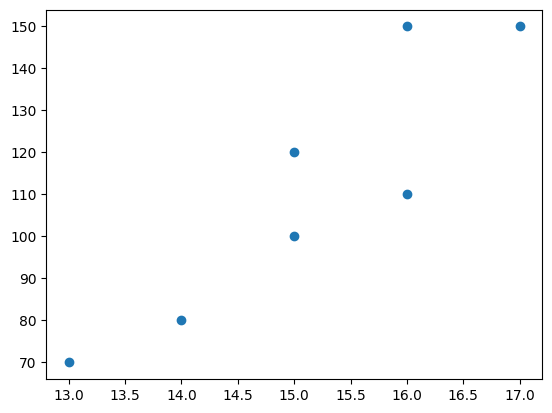

In [35]:
import matplotlib.pyplot as plt

# 気温と売り上げの一週間分の記録を保持したリスト
pair_list = [(15, 120), (14, 80), (17, 150), (16, 150), (16, 110), (15, 100), (13, 70)]

# 売り上げ金額を縦軸、気温を横軸とした散布図（scatter plot）
plt.scatter([x for x, y in pair_list], [y for x, y in pair_list])

Memo 気温と売り上げ金額は比例関係にありそうということがわかる

#### 相関係数
$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$

In [36]:
# 相関係数の計算
x_i = [x for x, y in pair_list]
y_i = [y for x, y in pair_list]
x_bar = np.mean(x_i)
y_bar = np.mean(y_i)
# 分子
numerator = np.sum([(x - x_bar) * (y - y_bar) for x, y in pair_list])
# 分母
denominator1 = np.sqrt(np.sum([(x - x_bar) ** 2 for x in x_i]))

denominator2 = np.sqrt(np.sum([(y - y_bar) ** 2 for y in y_i]))

r_xy = numerator / (denominator1 * denominator2)
r_xy

0.9042001578168488

### 確率と確率分布

(array([ 998920., 1000403., 1000842., 1000624., 1000769.,  999348.,
        1000049.,  999025., 1000406.,  999614.]),
 array([7.83329159e-08, 1.00000063e-01, 2.00000049e-01, 3.00000034e-01,
        4.00000019e-01, 5.00000004e-01, 5.99999989e-01, 6.99999974e-01,
        7.99999960e-01, 8.99999945e-01, 9.99999930e-01]),
 <BarContainer object of 10 artists>)

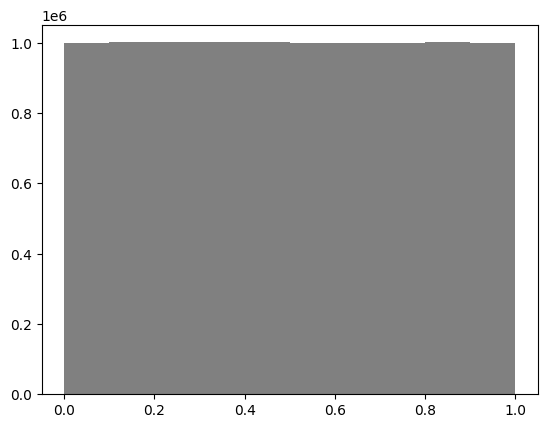

In [37]:
# 一様分布からの擬似乱数の発生
plt.hist(np.random.random(10000000), color="gray")

#### 確率変数
* 離散確率変数
    * ベルヌーイ分布
* 連続確率変数
    * 一様分布
    * 正規分布

(array([  7.,  26.,  77., 135., 239., 224., 159., 103.,  21.,   9.]),
 array([450., 460., 470., 480., 490., 500., 510., 520., 530., 540., 550.]),
 <BarContainer object of 10 artists>)

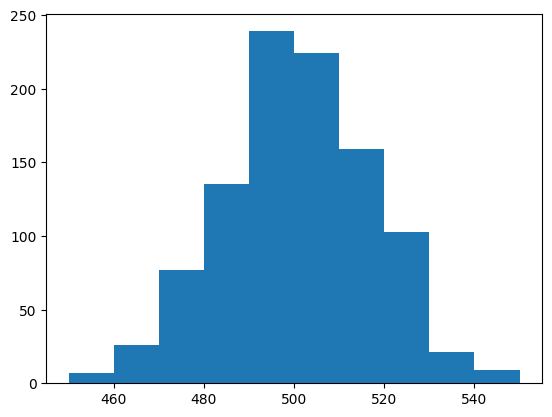

In [38]:
# コインで表が出る数の分布
all_sum = list()
n = 1000  # 　試行回数

for _ in range(1000):
    sum_ = 0
    for _ in range(n):
        sum_ += (
            np.random.random() > 0.5
        )  # 一様乱数を閾値(p:0.5)で切って「離散化」することでベルヌーイ試行を実現している
    all_sum.append(sum_)
plt.hist(all_sum)

(array([485., 240., 144.,  64.,  33.,  21.,   6.,   5.,   0.,   2.]),
 array([   0. ,  648.8, 1297.6, 1946.4, 2595.2, 3244. , 3892.8, 4541.6,
        5190.4, 5839.2, 6488. ]),
 <BarContainer object of 10 artists>)

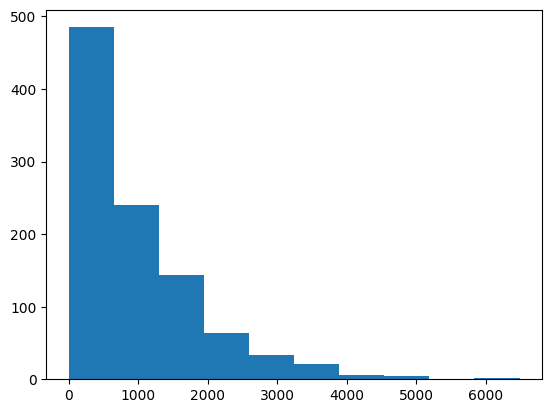

In [39]:
# 毎回確率が0.001で当たるクジを最大10000回引く時、何回目で当たりを引くかの分布
all_sum = list()
for _ in range(1000):
    for i in range(10000):
        if np.random.random() < 0.001:
            all_sum.append(i)
            break

plt.hist(all_sum)

(array([  2.,  23.,  64., 150., 230., 256., 147.,  88.,  35.,   5.]),
 array([-3.30152068, -2.6575992 , -2.01367772, -1.36975624, -0.72583476,
        -0.08191328,  0.5620082 ,  1.20592968,  1.84985116,  2.49377264,
         3.13769412]),
 <BarContainer object of 10 artists>)

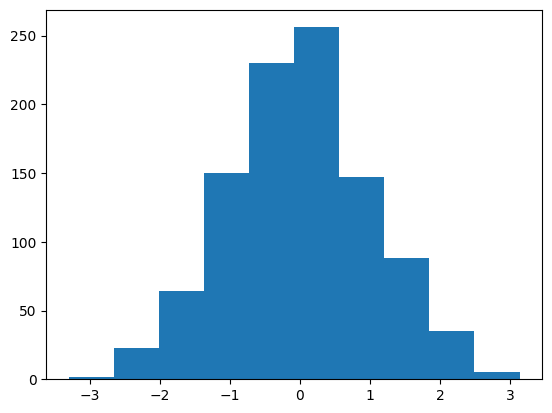

In [40]:
# 正規分布　平均値を中心に左右対称になる（物理的な世界でよく現れる分布らしい）
plt.hist(
    np.random.normal(size=1000)
)  # 標準正規分布に従う乱数を指定された数（この場合は1000個）生成

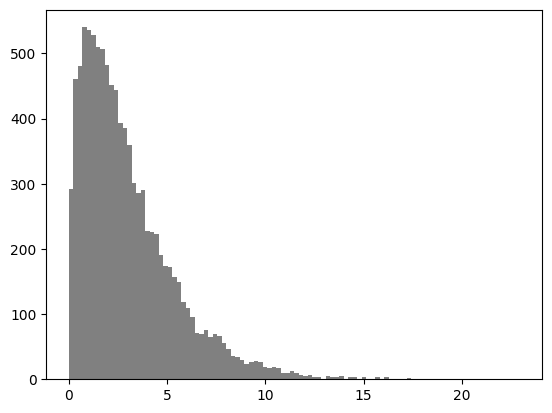

In [41]:
""" カイ二乗分布に従うサンプルのヒストグラム
正規分布に従う確率変数を２乗したものをk個足しわせたものをカイ二乗分布という。
"""

N = 10000
plt.hist(
    np.random.normal(size=N) ** 2
    + np.random.normal(size=N) ** 2
    + np.random.normal(size=N) ** 2,
    bins=100,  # ヒストグラムの棒の数
    color="gray",
)

plt.show()

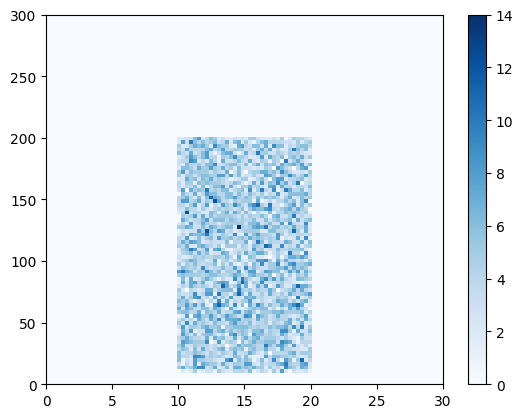

In [42]:
# 2変数の独立な一様分布からのサンプル
import matplotlib.pyplot as plt
import numpy as np

# 気温(10から20までの数値をランダムに含む、長さ10000の配列を生成)
x = np.random.uniform(low=10, high=20, size=10000)
# 売上金額(10から200までの数値をランダムに含む、長さ10000の配列を生成)
y = np.random.uniform(10, 200, size=10000)

plt.hist2d(x, y, bins=100, range=[[0, 30], [0, 300]], cmap="Blues")

plt.colorbar()

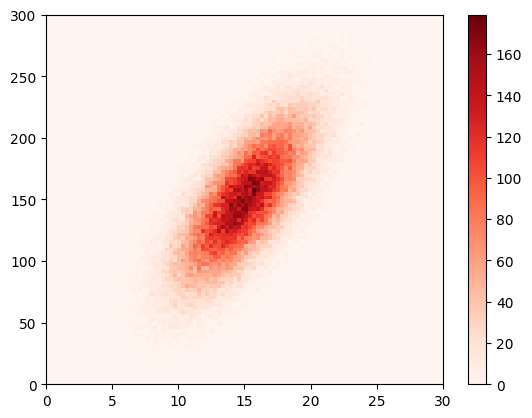

In [43]:
# 2変数の独立な一様分布からのサンプル
import matplotlib.pyplot as plt
import numpy as np

# 気温(平均が15で標準偏差が3の正規分布からランダムに抽出された100,000個の数値を含む配列)
x = np.random.normal(loc=15, scale=3, size=100000)
# 　誤差項
e = np.random.normal(loc=0, scale=30, size=100000)
# 売上金額
"""
気温と売上金額の間の線形関係を定義。
気温xに対する売上金額yの関係は、気温が1℃上昇するごとに売上が10単位増加すると仮定。
加えて、e（誤差項）によって、この線形関係にバリエーション（ばらつき）を加えることで
実際のデータにより近い形のシミュレーションをしている
"""
y = 10 * x + e

plt.hist2d(x, y, bins=100, range=[[0, 30], [0, 300]], cmap="Reds")

plt.colorbar()

<Axes: >

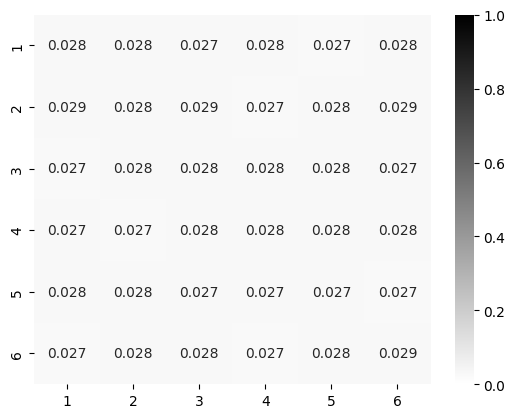

In [44]:
# 二つの独立なサイコロを投げた時の結果
import seaborn as sns

dice = [1, 2, 3, 4, 5, 6]

x = np.random.choice(dice, size=100000)
y = np.random.choice(dice, size=100000)

hist, _, _ = np.histogram2d(x, y, bins=len(dice), range=[[1, 6], [1, 6]])

sns.heatmap(
    hist / 100000,
    annot=True,
    xticklabels=dice,
    yticklabels=dice,
    vmax=1,
    vmin=0,
    cmap="gray_r",
)

Text(50.722222222222214, 0.5, 'n')

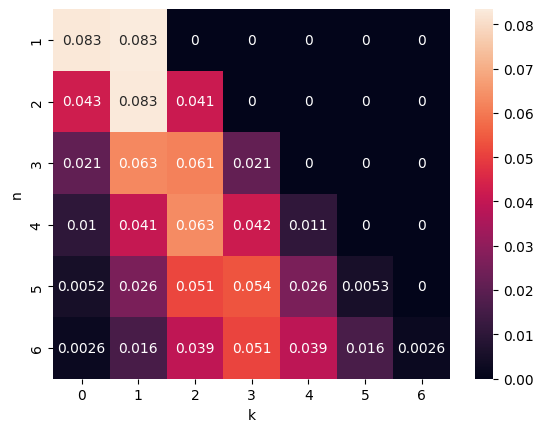

In [45]:
# 非独立な２つの離散確率変数からのサンプル
""" サイコロを振って出た目をX（サイコロの目）とし、
そのX回数だけコインを投げ、表が出た回数をYとする。
ここで、XとYの結合確率分布をヒートマップで表示する。
Xはサイコロの目（1から6まで）、Yはコインの表が出た回数（0からXまでの可能性）である。
"""
import seaborn as sns

dice = [1, 2, 3, 4, 5, 6]

x = np.random.choice(dice, size=100000)
y = []

for trial_x in x:
    trial_y = sum([np.random.choice([0, 1]) for _ in range(trial_x)])
    y.append(trial_y)


hist, _, _ = np.histogram2d(
    x, y, bins=(len(dice), len(dice) + 1), range=[[1, 6], [0, 6]]
)

sns.heatmap(
    hist / 100000,
    annot=True,
    xticklabels=[0] + dice,
    yticklabels=dice,
)

plt.xlabel("k")
plt.ylabel("n")

In [46]:
# 周辺確率の計算
import seaborn as sns

dice = [1, 2, 3, 4, 5, 6]
x = np.random.choice(dice, size=100000)
y = []

for trial_x in x:
    trial_y = sum([np.random.choice([0, 1]) for _ in range(trial_x)])
    y.append(trial_y)

hist, _ = np.histogram(y, bins=len(dice) + 1, range=[0, 6])

for i, y_count in enumerate(hist):
    print(f"P( y = {i}　) = {y_count/len(y)}")

P( y = 0　) = 0.16613
P( y = 1　) = 0.3116
P( y = 2　) = 0.25693
P( y = 3　) = 0.16408
P( y = 4　) = 0.07751
P( y = 5　) = 0.02094
P( y = 6　) = 0.00281


### 条件付き確率

In [47]:
# x=3の時の条件付き確率
import seaborn as sns

dice = [1, 2, 3, 4, 5, 6]
x = np.random.choice(dice, size=100000)
y = []

for trial_x in x:
    trial_y = sum([np.random.choice([0, 1]) for _ in range(trial_x)])
    if trial_x == 3:
        y.append(trial_y)

hist, _ = np.histogram(y, bins=len(dice) + 1, range=[0, 6])

for i, y_count in enumerate(hist):
    print(f"P( y = {i} | x = 3 ) = {y_count/len(y)}")

P( y = 0 | x = 3 ) = 0.12508361204013377
P( y = 1 | x = 3 ) = 0.3658254788689571
P( y = 2 | x = 3 ) = 0.37993311036789296
P( y = 3 | x = 3 ) = 0.1291577987230161
P( y = 4 | x = 3 ) = 0.0
P( y = 5 | x = 3 ) = 0.0
P( y = 6 | x = 3 ) = 0.0


In [48]:
# ナイーブベイズの実装
class NaiveBayesModel:
    def __init__(self, d, param_x_bar_y_list, param_y):
        """
        ナイーブベイズモデルの初期化。

        Args:
            d (int): 特徴の数。(説明変数の次元数)
            param_x_bar_y_list (list of np.array): 各クラスにおける特徴の条件付き確率の初期値のリスト。
            param_y (np.array): 各クラスの確率の初期値。（事前確率）
        """
        self.d = d
        self.param_x_bar_y = np.array(param_x_bar_y_list)
        self.param_y = np.array(param_y)
        self.num_class = len(param_y)

    def prob(self, X, y):
        """
        与えられたデータポイントとクラスラベルに対する同時確率を計算する。

        Args:
            X (np.array): 特徴ベクトル。
            y (int): クラスラベル。

        Returns:
            float: 同時確率。
        """
        prob_y = self.param_y[y]
        prob_x_bar_y = 1
        for x_, y_ in zip(X, y):
            for i in range(self.d):
                if x_[i] == 1:
                    prob_x_bar_y *= self.param_x_bar_y[y_][i]
                else:
                    prob_x_bar_y *= 1 - self.param_x_bar_y[y_][i]
            return prob_x_bar_y * np.prod(prob_y)

    def fit(self, X, y):
        """
        トレーニングデータを使用してモデルのパラメータを学習する。

        Args:
            X (np.array): 特徴ベクトルの配列。
            y (np.array): クラスラベルの配列。
        """
        for j in range(self.num_class):
            self.param_x_bar_y[j] = np.mean(X[y == j], axis=0)
        self.param_y = np.mean(np.eye(self.num_class)[y], axis=0)

    def predict(self, x):
        """
        新しいデータポイントに対するクラスラベルの予測を行う。

        Args:
            X (np.array): 特徴ベクトルの配列。

        Returns:
            np.array: 予測されたクラスラベルの配列。
        """
        prob_x = sum([self.prob([x], [j]) for j in range(self.num_class)])
        prob_x_bar_y = [self.prob([x], [j]) / prob_x for j in range(self.num_class)]
        return np.argmax(prob_x_bar_y)

In [49]:
# 以下が与えられたとする。
# X:0または、1のデータ数×d次元のarray
# y:0、1、2のデータ数次元のarray
# 初期パラメータ
# param_x_bar_y*: P(X=x|Y=y)に対応する初期パラメータ
#                 長さ4のarray
# param_y*: P(Y=y)に対応する初期パラメータ
#                 長さ3のarray
import numpy as np

# 特徴の数
d = 4

# 各クラスにおける特徴の条件付き確率の初期値
# ここでは一様初期化（0.5）を使用
param_x_bar_y1 = np.full(d, 0.5)  # 商品Aを推薦する場合の条件付き確率
param_x_bar_y2 = np.full(d, 0.5)  # 商品Bを推薦する場合の条件付き確率
param_x_bar_y3 = np.full(d, 0.5)  # 商品Cを推薦する場合の条件付き確率

# 各クラスの確率の初期値
# ここでは一様初期化（1/3）を使用
param_y = np.full(3, 1 / 3)

# モデルの初期化
model = NaiveBayesModel(d, [param_x_bar_y1, param_x_bar_y2, param_x_bar_y3], param_y)
# トレーニングデータの定義
X = np.array([[1, 0, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0]])
y = np.array([0, 1, 2])

print("before", model.prob(X, y))
model.fit(X, y)
print("after", model.prob(X, y))
pred_y = [model.predict(x) for x in X]
pred_y

before 0.0023148148148148147
after 0.037037037037037035


[0, 1, 2]